In [1]:
import torch
import torchvision
import torchtext
import sys
sys.path.append('../')
import config
from config import DATA_PATH
from torchvision.transforms import v2 as transforms
from datamodules import IMDBDataModule, CIFARDataModule, LibriSpeechDataModule, SpeechCommandsDataModule, Flickr8AudioDataModule
import logging
logger = logging.getLogger(__name__)

In [1]:
ds = IMDBDataModule(data_path=DATA_PATH,
                    batch_size=32,
                    num_workers=5,
                    num_max_bpe_tokens=512,
                    shuffle=True,
                    drop_last=True,
                    )

NameError: name 'IMDBDataModule' is not defined

In [31]:
ds.prepare_data()

Data already exists. Skip creating it.
Data already exists. Skip creating it.


In [43]:
ds.setup('test')

Load 25000 text examples.


In [33]:
loader = ds.train_dataloader()

In [34]:
loader_iter = iter(loader)

In [39]:
b=next(loader_iter)

In [42]:
b['language_tokens'].shape

torch.Size([32, 512])

In [2]:
ds = EnWik9Dataset(data_path=DATA_PATH,
                   batch_size=32,
                   num_workers=10,
                   num_max_bpe_tokens=512,)

In [ ]:
ds.prepare_data()

In [ ]:
ds.setup()

In [12]:
ds = CIFARDataModule(data_path=DATA_PATH,
                    batch_size=32,
                    num_workers=5,
                    type='cifar10',
                    shuffle=True,
                    drop_last=True,
                    )

In [13]:
ds.prepare_data()

Files already downloaded and verified
Files already downloaded and verified


In [5]:
ds.setup('fit')

In [6]:
loader = ds.train_dataloader()

In [7]:
loader_iter = iter(loader)

In [8]:
b=next(loader_iter)

In [11]:
b['image'].shape

torch.Size([32, 3, 224, 224])

In [2]:
ds = LibriSpeechDataModule(data_path=DATA_PATH,
                    sample_rate=16000,
                    max_sample_size=320000,
                    min_sample_size=32000,
                    precompute_mask_config={
                        'feature_encoder_spec': '[(512, 10, 5)] + [(512, 3, 2)] * 4 + [(512,2,2)] + [(512,2,2)]'
                    },
                    type='train-clean-100',
                    batch_size=32,
                    num_workers=4,
                    shuffle=True,
                    drop_last=True,
                    )

In [3]:
ds.prepare_data()

In [4]:
ds.setup('fit')

In [5]:
loader = ds.train_dataloader()

In [6]:
loader_iter = iter(loader)

In [7]:
b=next(loader_iter)

In [9]:
b

{'id': tensor([13739, 23679, 15584,  2842, 16770, 10733, 24544, 25857, 20602, 27968,
           586,  7061,  1678,  3295, 11294, 25649, 22392, 25551,  1222, 17027,
         16134, 14407, 12839,  8639,  4447, 16349,  3390,  1536, 16905, 10352,
         20260,  9649]),
 'audio': tensor([[ 0.1434,  0.1970,  0.2531,  ...,  0.8795,  0.7710,  0.7199],
         [ 0.5050,  0.7065,  0.8682,  ...,  0.0447,  0.0440,  0.0526],
         [ 2.0687,  2.8521,  1.8890,  ..., -0.0058, -0.0086, -0.0091],
         ...,
         [ 2.6879,  2.8653,  2.8942,  ..., -0.0086, -0.1261, -0.2539],
         [ 0.9282,  0.8093,  0.9436,  ...,  0.9603,  0.8756,  0.7874],
         [ 0.4045, -0.7784, -1.6616,  ...,  0.1505, -0.0950, -0.4152]]),
 'precomputed_mask': tensor([[1., 0., 0.,  ..., 1., 1., 0.],
         [1., 0., 1.,  ..., 1., 1., 1.],
         [1., 0., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 0.,  ..., 1., 0., 1.],
         [1., 1., 1.,  ..., 0., 1., 1.],
         [1., 1., 0.,  ..., 0., 1., 1.]])}

In [2]:
ds = SpeechCommandsDataModule(data_path=DATA_PATH,
                              feature_encoder_spec='[(512, 10, 5)] + [(512, 3, 2)] * 4 + [(512,2,2)] + [(512,2,2)]',
                              batch_size=32,
                              num_workers=5,
                              shuffle=True,
                              drop_last=True,
                              )

In [3]:
ds.prepare_data()

In [4]:
ds.setup('fit')

In [5]:
loader = ds.train_dataloader()

In [6]:
loader_iter = iter(loader)

In [7]:
b=next(loader_iter)

In [8]:
b

{'audio': tensor([[ 9.1553e-05,  1.2207e-04,  1.5259e-04,  ...,  6.1035e-05,
           6.1035e-05,  6.1035e-05],
         [ 2.1057e-03,  3.8757e-03,  5.0659e-03,  ..., -7.0496e-03,
          -6.8665e-03, -5.3101e-03],
         [-5.4932e-04, -7.0190e-04, -4.2725e-04,  ...,  0.0000e+00,
          -9.1553e-05, -1.2207e-04],
         ...,
         [ 3.0518e-05, -9.1553e-05, -9.1553e-05,  ...,  3.0518e-05,
          -3.0518e-05, -1.2207e-04],
         [ 0.0000e+00, -6.1035e-05, -9.1553e-05,  ..., -3.0518e-05,
           3.3569e-04,  6.7139e-04],
         [ 4.2725e-04,  7.6294e-04,  1.1292e-03,  ..., -5.6366e-02,
          -6.3782e-02, -6.4484e-02]]),
 'label': tensor([29, 17,  8, 22, 13,  3,  6, 27, 26,  8, 29, 23, 16,  1,  1,  4, 28, 21,
         14, 22, 19, 16, 20, 20, 10, 30, 10, 13, 12, 10,  4,  8]),
 'id': tensor([79817, 58067, 25032, 74100, 35973, 69012,  1448,  8023, 27665, 25367,
         79131, 75755, 66392, 12484, 12545,   798, 59311, 54927, 32393, 73040,
          3562, 67160, 8

In [5]:
num_max_bpe_tokens=512
from rich.progress import track
from data_utils import get_bpe_encoder
from fairseq.data import Dictionary
import sys
sys.path.append('../')
from data import openai_imagenet_template, imagenet_classnames
import os
import torch
tokenizer = get_bpe_encoder('../data')
dictionary = Dictionary.load(os.path.join('../data', "dict.txt"))

In [13]:
zeroshot_weights = []
for classname in track(imagenet_classnames, description="Building classifier"):
    texts = tokenizer.encode_lines(
        [template(classname) for template in openai_imagenet_template],
        tokens_per_sample=num_max_bpe_tokens-2,
        to_tensor=False,
    )
    padding_masks = []
    for i in range(len(texts)):
        texts[i] = [dictionary.bos()] + texts[i] + [dictionary.eos()]
        length = len(texts[i])
        texts[i] = texts[i] + [dictionary.pad()] * (num_max_bpe_tokens - length)
        padding_mask = [0] * length + [1] * (num_max_bpe_tokens - length)
        padding_masks.append(padding_mask)

    texts = torch.tensor(texts, dtype=torch.long)
    padding_masks = torch.tensor(padding_masks, dtype=torch.long)
    assert texts.size(1) == num_max_bpe_tokens
    assert padding_masks.size(1) == num_max_bpe_tokens

Output()

In [11]:
texts.shape

torch.Size([80, 512])

In [10]:
padding_masks

tensor([[0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]])

In [55]:
import glob
import os
import re

In [59]:
nlp_dir_path = "../data/language"

In [64]:
dataset_path = os.path.join(nlp_dir_path, 'openwebtext')
pattern = os.path.join(nlp_dir_path, '*.tar')
files = glob.glob(pattern)
print(f"OpenWebTextDataset: Found {len(files)} tar files, inflating...")
for file in files:
    os.system(f"tar -xf {file} -C {nlp_dir_path}")
    os.remove(file)
pattern = os.path.join(dataset_path, '*.xz')
files = glob.glob(pattern)
for file in files:
    os.system(f"unxz {file}")
print("OpenWebTextDataset: Inflated all tar files.")

pattern = rb'\x00+'

print("OpenWebTextDataset: Cleaning...")
files = os.listdir(dataset_path)
for file in files:
    with open(os.path.join(dataset_path, file), 'rb') as f:
        first_line = f.readline()
        rest_of_file = f.read()
    
    matches = list(re.finditer(pattern, first_line))
    if matches:
        first_line = first_line[matches[-1].end():]

    with open(os.path.join(dataset_path, file), 'wb') as f:
        f.write(first_line)
        f.write(rest_of_file)

    with open(os.path.join(dataset_path, file), 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    with open(os.path.join(dataset_path, file), 'w', encoding='utf-8') as f:
        for line in lines:
            stripped_line = line.strip()
            if stripped_line != '' and stripped_line != '---':
                f.write(line)

OpenWebTextDataset: Found 0 tar files, inflating...
OpenWebTextDataset: Inflated all tar files.
OpenWebTextDataset: Cleaning...


In [67]:
print("OpenWebTextDataset: Joining...")
with open(os.path.join(dataset_path, 'openwebtext.txt'), 'w') as f:
    for file in files:
        path_to_file = os.path.join(dataset_path, file)
        with open(path_to_file, 'r') as f2:
            f.write(f2.read())
        os.remove(path_to_file)

OpenWebTextDataset: Joining...


In [68]:
import subprocess
from bpe_encoder import encode

In [ ]:
in_file = os.path.join(dataset_path, 'openwebtext.txt')
out_file = os.path.join(dataset_path, 'openwebtext.bpe')
encode(f'../data/encoder.json', f'../data/vocab.bpe', [in_file], [out_file], keep_empty=True)
os.remove(in_file)
process = ['fairseq-preprocess', '--only-source', '--srcdict', f'../data/dict.txt',
            '--trainpref', out_file, '--destdir', f'{dataset_path}', '--workers', f'{os.cpu_count()}']
subprocess.run(process)
os.remove(out_file)

In [2]:
dm = Flickr8AudioDataModule(data_path='../data',
                            transform_jitter=False,
                            beit_transforms=False,
                            no_transform=True,
                            crop_scale=(0.6, 1.0),
                            sample_rate=16000,
                            max_sample_size=320000,
                            min_sample_size=32000,
                            normalize=True,
                            pad=True,
                            batch_size=32,
                            num_workers=4,
                            shuffle=False,
                            drop_last=True,
                            feature_encoder_spec='[(512, 10, 5)] + [(512, 3, 2)] * 4 + [(512,2,2)] + [(512,2,2)]'
                            )

In [3]:
dm.prepare_data()

Write ../data/flickr8k/flickr8k.test.jsonl with 5000 items !


In [4]:
dm.setup('test')

In [5]:
dl = dm.test_dataloader()

In [6]:
dl_iter = iter(dl)

In [7]:
b = next(dl_iter)

In [8]:
b

{'audio': tensor([[-5.7055e-02, -1.0609e-01, -9.6866e-02,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 3.9002e-04,  2.5379e-02,  7.1035e-03,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [-4.8352e-01, -8.2998e-01, -6.9869e-01,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ...,
         [ 5.9257e-04,  8.3477e-04,  5.9257e-04,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 1.0129e-03, -2.4716e-03, -7.2933e-04,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 2.0393e-03,  3.4369e-03,  3.9959e-03,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]]),
 'padding_mask': tensor([[False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,  True,  True,  True],
         [False, False, False,  ...,  True,  True,  True],
         [False, Fal

In [9]:
import matplotlib.pyplot as plt

In [24]:
import soundfile as sf
from PIL import Image
from IPython.display import Audio

In [25]:
Audio(sf.read("../data/flickr8k/flickr_audio/wavs/3385593926_d3e9c21170_0.wav")[0], rate=16000)

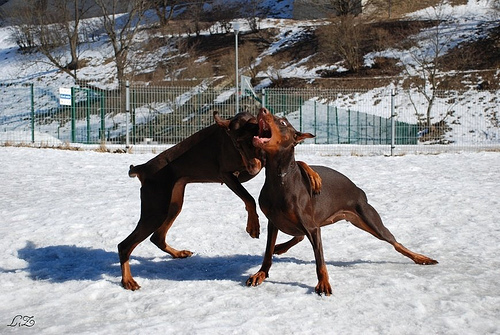

In [23]:
Image.open("../data/flickr8k/flickr8k-images/3385593926_d3e9c21170.jpg")